# Central Limit Theorem experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Run mean calculation for uniform distributed numbers

In [12]:
# Number of measurements to average

Nmean = 20

# Number of experiments

Ntry = 100000

# Flat distribution with mean=0 and standard deviation=sqrt(Nmean)

Rmax = sqrt(12.*Nmean)/2.

mean_tab = np.empty(Ntry,dtype=double)

for itry in range(Ntry):
    x_tab = np.random.uniform(-Rmax,Rmax,size=Nmean)
    mean_tab[itry]=np.mean(x_tab)

### (3) Plot results

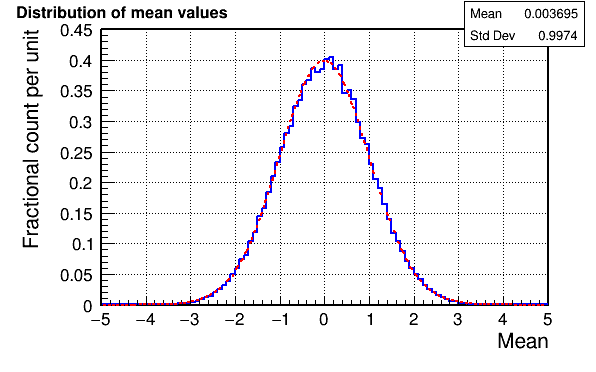

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Warning in <TROOT::Append>: Replacing existing TH1: hexp (Potential memory leak).
Info in <TCanvas::Print>: png file central_limit_20.png has been created


In [13]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Create result histogram

Xmax=5.
Nbin = 100
dX=2.*Xmax/Nbin

hexp = TH1D('hexp','Distribution of mean values',Nbin, -Xmax, Xmax)

# Fill histogram

w = 1./dX/Ntry

for itry in range(Ntry):
    hexp.Fill(mean_tab[itry],w)

# Axis description

hexp.GetXaxis().SetTitle("Mean")
hexp.GetYaxis().SetTitle("Fractional count per unit")

# Show histogram statistics

hexp.SetStats(1)

# Plot style

hexp.SetMarkerStyle(20)
hexp.SetMaximum(0.45)
hexp.SetMinimum(0.)
hexp.DrawCopy('HIST')

# Expected dependence

def myGauss(x, par):
    norm = 1/(par[0] * np.sqrt(2 * np.pi))
    val = np.exp( - x[0]**2 / (2 * par[0]**2))
    return norm*val

# Define user function

fexp=TF1("fexp",myGauss,-Xmax,Xmax,1)
fexp.SetParameter(0,1.)
fexp.SetNpx(100)
fexp.SetTitle("Gauss distribution")
fexp.SetLineStyle(2)
fexp.SetLineColor(2)
fexp.DrawCopy("Lsame")

cexp.Update()
fname = 'central_limit_'+str(Nmean)+'.png'
cexp.Print(fname)

Image(filename=fname)

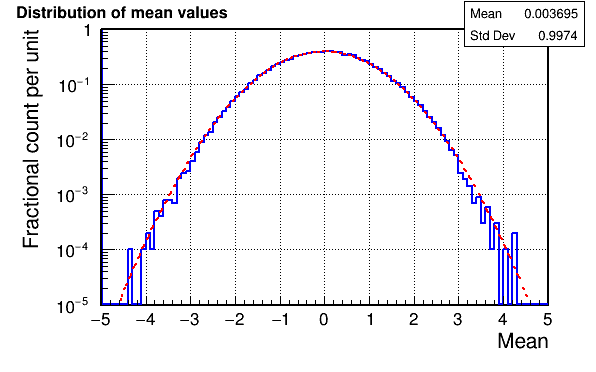

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp2
Info in <TCanvas::Print>: png file central_limit_20_log.png has been created


In [14]:
# Log scale

gStyle.SetOptLogy(1)

# Create plot canvas

cexp2 = TCanvas('cexp2')
   
hexp.SetMaximum(1.)
hexp.SetMinimum(0.00001)
hexp.DrawCopy('HIST')

fexp.DrawCopy("Lsame")

cexp2.Update()
fname = 'central_limit_'+str(Nmean)+'_log.png'
cexp2.Print(fname)

Image(filename=fname)